In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plta

In [2]:
# Importing warnings
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [3]:
warnings.filterwarnings("ignore")

In [11]:
df =pd.read_csv('/content/data/dataset_mood_smartphone.csv')

In [12]:
import pandas as pd

# Check if 'Unnamed: 0' exists and drop it
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Convert 'time' column to datetime with error handling
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Check for rows with NaT values
print(df[df['time'].isna()])

# Create a new 'date' column
df['date'] = df['time'].dt.date

Empty DataFrame
Columns: [id, time, variable, value]
Index: []


In [13]:
df

,id,time,variable,value,date
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000,2014-02-26
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000,2014-02-26
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000,2014-02-26
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000,2014-02-26
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000,2014-02-27
...,...,...,...,...,...
376907,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032,2014-04-11
376908,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008,2014-04-19
376909,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026,2014-04-26
376910,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033,2014-04-27


In [14]:
counted = df.groupby(["variable"]).size()

print (len(counted))

19


In [15]:
counted

variable
activity                22965
appCat.builtin          91288
appCat.communication    74276
appCat.entertainment    27125
appCat.finance            939
appCat.game               813
appCat.office            5642
appCat.other             7650
appCat.social           19145
appCat.travel            2846
appCat.unknown            939
appCat.utilities         2487
appCat.weather            255
call                     5239
circumplex.arousal       5643
circumplex.valence       5643
mood                     5641
screen                  96578
sms                      1798
dtype: int64

In [16]:
users=list(df['id'].unique())
vars = list(df['variable'].unique())
meanVals=['mood', 'activity', 'circumplex.arousal', 'circumplex.valence']
sumVals=[]
for var in vars:
  if var not in meanVals:
    sumVals.append(var)

In [17]:
res_df = pd.DataFrame()

In [18]:
for user in users:
  df_user=df[df['id']==user]
  vars= df_user['variable']
  meanTable = df_user.loc[vars.isin(meanVals)]
  sumTable = df_user.loc[~vars.isin(meanVals)]
  # Make all variables as columns, using time as index (merging data in the same day)
  score_df = meanTable.pivot_table(index="date", columns="variable", values="value", aggfunc=np.mean)
  cumulative_df = sumTable.pivot_table(index="date", columns="variable", values="value", aggfunc=np.sum)
  new_df = score_df.join(cumulative_df)
  new_df['id']=user
  new_df=new_df.reset_index()
  res_df=pd.concat([res_df,new_df])
  print('user',user,'is done ')

user AS14.01 is done 
user AS14.02 is done 
user AS14.03 is done 
user AS14.05 is done 
user AS14.06 is done 
user AS14.07 is done 
user AS14.08 is done 
user AS14.09 is done 
user AS14.12 is done 
user AS14.13 is done 
user AS14.14 is done 
user AS14.15 is done 
user AS14.16 is done 
user AS14.17 is done 
user AS14.19 is done 
user AS14.20 is done 
user AS14.23 is done 
user AS14.24 is done 
user AS14.25 is done 
user AS14.26 is done 
user AS14.27 is done 
user AS14.28 is done 
user AS14.29 is done 
user AS14.30 is done 
user AS14.31 is done 
user AS14.32 is done 
user AS14.33 is done 


In [19]:
res_df

variable,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,...,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,id
0,2014-02-26,NaN,-0.250000,0.750000,6.250000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,AS14.01
1,2014-02-27,NaN,0.000000,0.333333,6.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS14.01
2,2014-03-20,0.081548,NaN,NaN,NaN,248.979,2168.229,350.856,NaN,NaN,...,11.345,807.731,NaN,45.173,21.074,NaN,1.0,2275.944000,NaN,AS14.01
3,2014-03-21,0.134050,0.200000,0.200000,6.200000,3139.218,6280.890,1007.456,49.544,NaN,...,239.751,4508.500,915.445,NaN,598.754,NaN,6.0,17978.907000,NaN,AS14.01
4,2014-03-22,0.236880,0.600000,0.500000,6.400000,731.429,4962.918,93.324,21.076,NaN,...,98.143,439.632,37.305,NaN,117.621,NaN,3.0,6142.161000,1.0,AS14.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,2014-05-27,0.012704,-0.600000,0.400000,6.200000,726.391,2078.403,124.694,NaN,NaN,...,142.686,2010.364,NaN,NaN,56.173,NaN,1.0,4089.879001,2.0,AS14.33
42,2014-05-28,0.103301,0.000000,1.200000,8.200000,2551.046,1936.415,614.706,NaN,NaN,...,529.946,5361.211,NaN,NaN,30.666,NaN,10.0,14320.867998,1.0,AS14.33
43,2014-05-29,0.169354,-1.333333,1.000000,7.000000,400.034,435.105,136.738,NaN,NaN,...,29.202,1789.922,0.939,NaN,3.199,NaN,5.0,3569.341000,1.0,AS14.33
44,2014-05-30,0.192901,-0.800000,-0.400000,6.800000,3044.030,1670.842,260.220,NaN,NaN,...,52.610,3166.409,1052.648,8.072,232.825,NaN,4.0,9497.646999,NaN,AS14.33


In [20]:
!pip install business_calendar

In [21]:
from business_calendar import Calendar, MO, TU, WE, TH, FR

In [22]:
cal = Calendar(workdays=[MO,TU,WE,TH,FR])

In [23]:
def is_working_day(date):
  if cal.isbusday(date):
    return True
  else:
    return False

In [24]:
res_df['is_working_day'] = res_df['date'].map(is_working_day) # add a feature :  if a date is working day

In [25]:
res_df

variable,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,...,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,id,is_working_day
0,2014-02-26,NaN,-0.250000,0.750000,6.250000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,AS14.01,True
1,2014-02-27,NaN,0.000000,0.333333,6.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS14.01,True
2,2014-03-20,0.081548,NaN,NaN,NaN,248.979,2168.229,350.856,NaN,NaN,...,807.731,NaN,45.173,21.074,NaN,1.0,2275.944000,NaN,AS14.01,True
3,2014-03-21,0.134050,0.200000,0.200000,6.200000,3139.218,6280.890,1007.456,49.544,NaN,...,4508.500,915.445,NaN,598.754,NaN,6.0,17978.907000,NaN,AS14.01,True
4,2014-03-22,0.236880,0.600000,0.500000,6.400000,731.429,4962.918,93.324,21.076,NaN,...,439.632,37.305,NaN,117.621,NaN,3.0,6142.161000,1.0,AS14.01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,2014-05-27,0.012704,-0.600000,0.400000,6.200000,726.391,2078.403,124.694,NaN,NaN,...,2010.364,NaN,NaN,56.173,NaN,1.0,4089.879001,2.0,AS14.33,True
42,2014-05-28,0.103301,0.000000,1.200000,8.200000,2551.046,1936.415,614.706,NaN,NaN,...,5361.211,NaN,NaN,30.666,NaN,10.0,14320.867998,1.0,AS14.33,True
43,2014-05-29,0.169354,-1.333333,1.000000,7.000000,400.034,435.105,136.738,NaN,NaN,...,1789.922,0.939,NaN,3.199,NaN,5.0,3569.341000,1.0,AS14.33,True
44,2014-05-30,0.192901,-0.800000,-0.400000,6.800000,3044.030,1670.842,260.220,NaN,NaN,...,3166.409,1052.648,8.072,232.825,NaN,4.0,9497.646999,NaN,AS14.33,True


In [26]:
len(res_df)

1306

In [27]:
res_df.describe()

variable,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
count,1188.000000,1268.000000,1266.000000,1268.000000,1192.000000,1180.000000,847.000000,207.000000,193.000000,276.000000,1118.000000,986.000000,428.000000,263.000000,433.000000,113.000000,758.000000,1204.000000,436.000000
mean,0.120003,-0.103851,0.687112,6.990063,1417.196377,2724.499319,1201.011993,98.686865,540.841363,461.558359,176.259155,1405.562742,303.795091,162.414000,106.473192,45.468336,3.893140,6036.233945,2.470183
std,0.098301,0.662715,0.434602,0.736465,3846.147860,2468.521331,1923.918599,155.448526,1171.180079,2128.298133,395.506164,1983.531043,721.252660,317.982287,234.074451,53.280275,3.591849,4698.741757,2.440375
min,0.000000,-2.000000,-1.250000,3.000000,-80367.930000,1.095000,1.014000,1.004000,1.010000,0.044000,2.007000,0.725000,0.080000,0.111000,1.002000,1.007000,1.000000,0.462000,1.000000
25%,0.054872,-0.600000,0.400000,6.600000,262.857500,867.326500,201.178000,27.139000,82.664000,17.101750,44.475250,208.800000,62.251250,22.117500,9.033000,13.111000,1.000000,2441.129001,1.000000
50%,0.095634,0.000000,0.800000,7.000000,764.744000,2080.112000,662.911000,49.379000,209.750000,71.999000,65.192000,761.223000,143.343000,66.857000,26.402000,30.386000,3.000000,5031.296500,1.000000
75%,0.149358,0.400000,1.000000,7.500000,1556.790500,3795.601500,1553.342000,99.850000,540.616000,271.162750,139.047500,2002.337500,285.964250,177.680500,88.629000,54.055000,5.000000,8571.607250,3.000000
max,0.566171,2.000000,2.000000,9.333333,40323.877000,20718.749000,35937.645000,1321.104000,12996.495000,33283.021000,4335.307000,30073.421000,10548.116000,2821.547000,2257.626000,366.937000,31.000000,36204.105001,17.000000


In [28]:
var_list=res_df.columns.to_list()[2:-2]
nan_dic={}
nans=[]
nans_prec=[]

In [29]:
for var in var_list:
  nan_dic[var]=res_df[var].isnull().sum()
  nans.append(nan_dic[var])
  nans_prec.append(nan_dic[var]/len(res_df) )
nan_dic

{'circumplex.arousal': 38,
 'circumplex.valence': 40,
 'mood': 38,
 'appCat.builtin': 114,
 'appCat.communication': 126,
 'appCat.entertainment': 459,
 'appCat.finance': 1099,
 'appCat.game': 1113,
 'appCat.office': 1030,
 'appCat.other': 188,
 'appCat.social': 320,
 'appCat.travel': 878,
 'appCat.unknown': 1043,
 'appCat.utilities': 873,
 'appCat.weather': 1193,
 'call': 548,
 'screen': 102,
 'sms': 870}

In [30]:
nan_df= pd.DataFrame([nan_dic]).T
nan_df

,0
circumplex.arousal,38
circumplex.valence,40
mood,38
appCat.builtin,114
appCat.communication,126
appCat.entertainment,459
appCat.finance,1099
appCat.game,1113
appCat.office,1030
appCat.other,188


from matplotlib import pyplot as plt
nan_df[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
nan_df[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

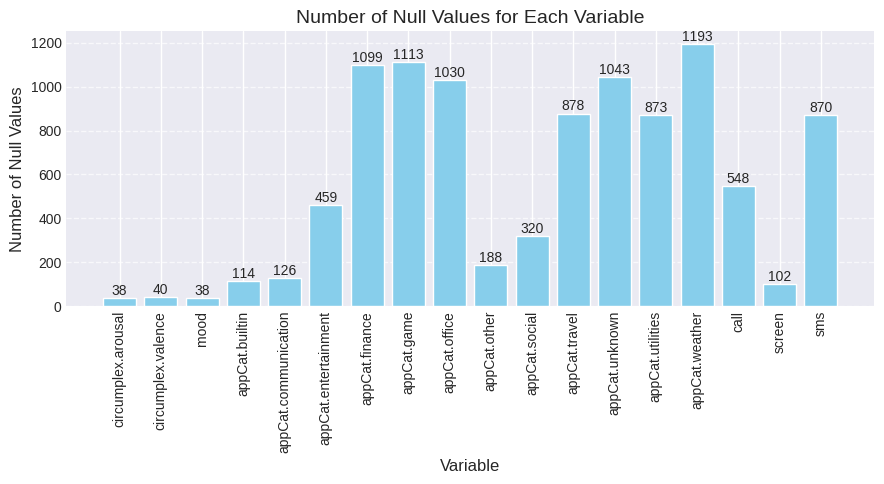

In [74]:
import matplotlib.pyplot as plt

# Assuming var_list contains your variable names and nans contains the number of null values

# Set style
plt.style.use('seaborn-darkgrid')

# Create bar plot
plt.bar(var_list, nans, color='skyblue')

# Add text annotations
for a, b in zip(var_list, nans):
    plt.text(a, b + 0.05, str(b), ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Number of Null Values', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Number of Null Values for Each Variable', fontsize=14)

# Display grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


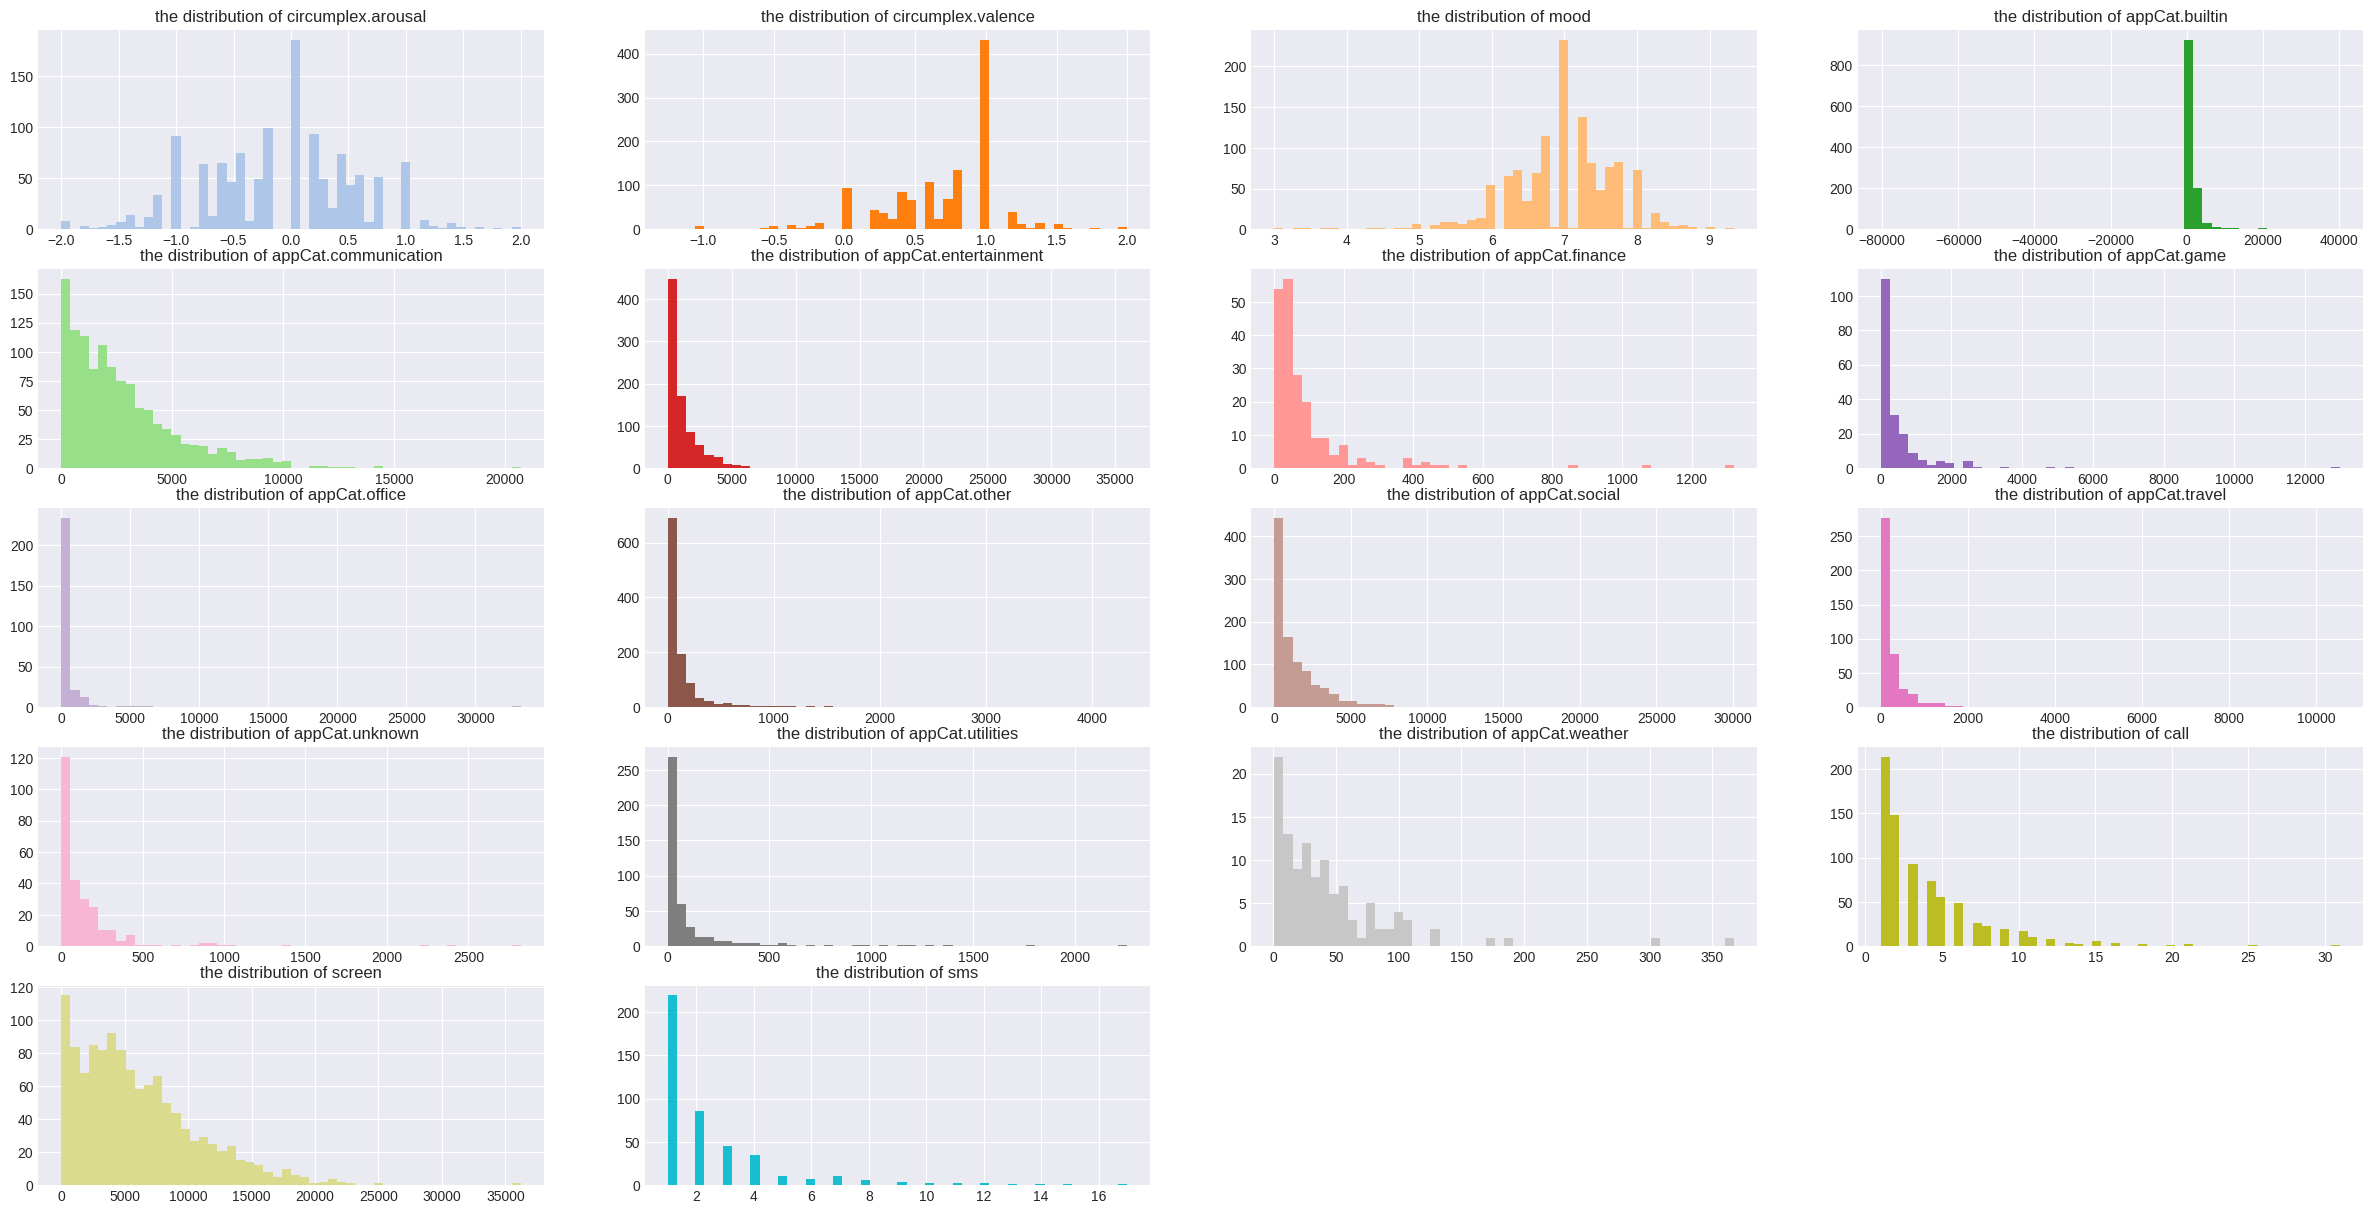

In [32]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20')

num=1
f= plt.figure(figsize=(30,15))
for var in var_list:
    ax = f.add_subplot(5,4,num)
    a = np.asarray(res_df[var].dropna())
    ax.hist(a,bins=50, color=palette(num))
    ax.set_title('the distribution of '+str(var))
    num+=1

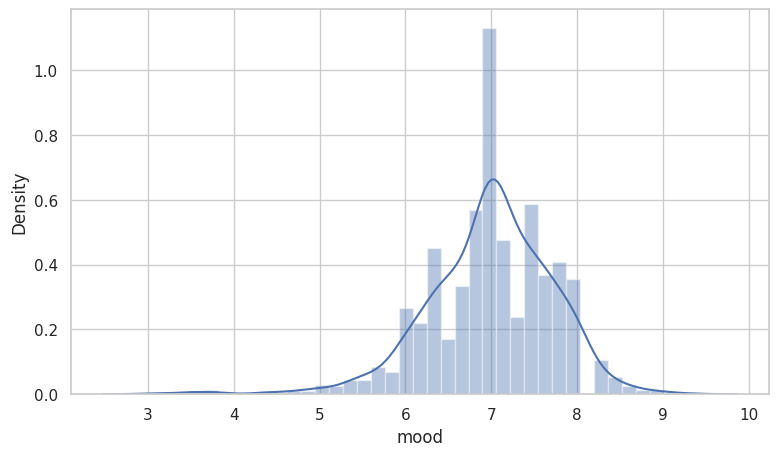

In [73]:
# sns.set_style("whitegrid")  # Set the background style
# sns.set_palette("hls")

# sns.set_palette("Greens")  # Set the color palette
sns.set(style="whitegrid", palette="deep", rc={"grid.alpha": 1})


# Set the figure size
mpl.rc("figure", figsize=(9, 5))

# Assuming res_df['mood'] contains your data
data = res_df['mood']

# Create a distribution plot using Seaborn
sns.distplot(data)

# Set the background color for the plot
# plt.gca().set_facecolor('#f5f5f5')  # Set background color to light gray

# Show the plot
plt.show()

In [34]:
res_df_corr= res_df.loc[:,var_list]

In [35]:
res_df_corr

variable,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
0,-0.250000,0.750000,6.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
1,0.000000,0.333333,6.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,248.979,2168.229,350.856,NaN,NaN,NaN,11.345,807.731,NaN,45.173,21.074,NaN,1.0,2275.944000,NaN
3,0.200000,0.200000,6.200000,3139.218,6280.890,1007.456,49.544,NaN,172.206,239.751,4508.500,915.445,NaN,598.754,NaN,6.0,17978.907000,NaN
4,0.600000,0.500000,6.400000,731.429,4962.918,93.324,21.076,NaN,NaN,98.143,439.632,37.305,NaN,117.621,NaN,3.0,6142.161000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,-0.600000,0.400000,6.200000,726.391,2078.403,124.694,NaN,NaN,NaN,142.686,2010.364,NaN,NaN,56.173,NaN,1.0,4089.879001,2.0
42,0.000000,1.200000,8.200000,2551.046,1936.415,614.706,NaN,NaN,357.909,529.946,5361.211,NaN,NaN,30.666,NaN,10.0,14320.867998,1.0
43,-1.333333,1.000000,7.000000,400.034,435.105,136.738,NaN,NaN,NaN,29.202,1789.922,0.939,NaN,3.199,NaN,5.0,3569.341000,1.0
44,-0.800000,-0.400000,6.800000,3044.030,1670.842,260.220,NaN,NaN,NaN,52.610,3166.409,1052.648,8.072,232.825,NaN,4.0,9497.646999,NaN


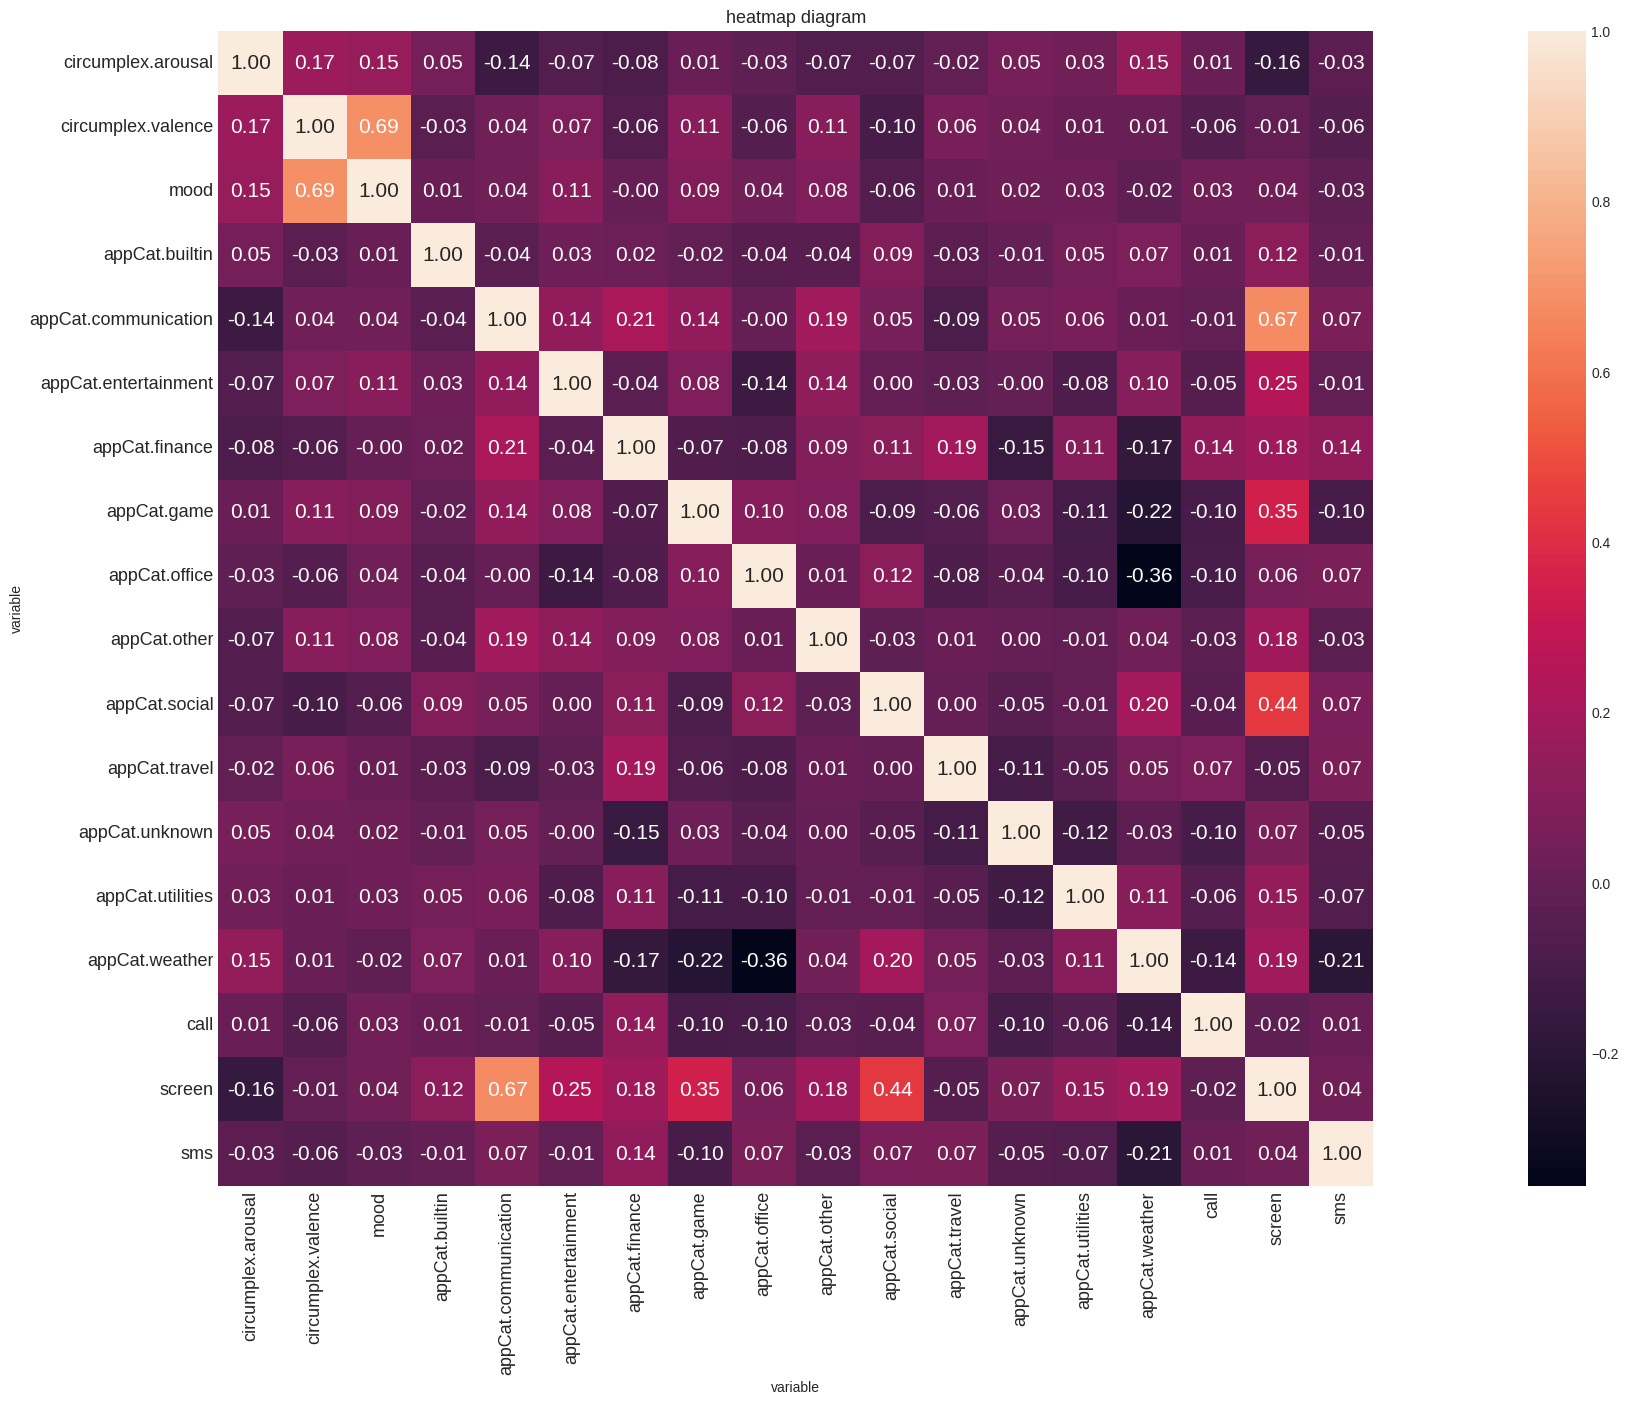

In [36]:
corr=res_df_corr.corr()
plt.figure(figsize=(40,15))
#plt.rc('font',family=' ',size=6)
sns.heatmap(corr,annot=True,fmt='.2f',square=True,annot_kws={"fontsize":15})
plt.title('heatmap diagram',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

<Axes: >

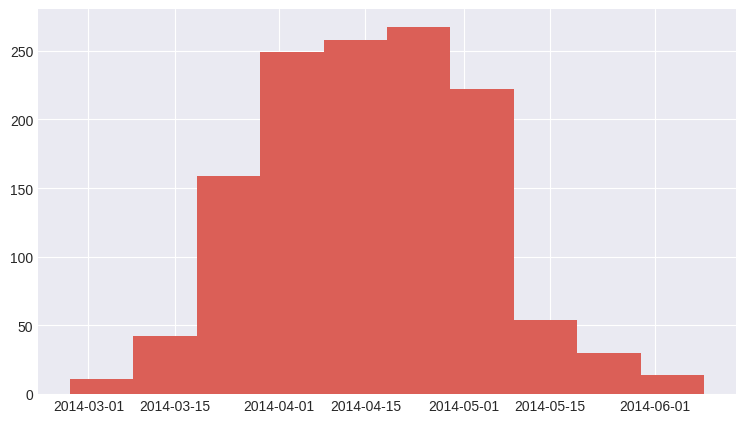

In [37]:
dfT = res_df["date"].apply(pd.Timestamp)
dfT.hist()

In [38]:
mood_df= res_df[['id','mood']]

In [39]:
mood_df

variable,id,mood
0,AS14.01,6.250000
1,AS14.01,6.333333
2,AS14.01,NaN
3,AS14.01,6.200000
4,AS14.01,6.400000
...,...,...
41,AS14.33,6.200000
42,AS14.33,8.200000
43,AS14.33,7.000000
44,AS14.33,6.800000


In [40]:
mood_group=mood_df.groupby('id').agg('mean')

In [41]:
mood_group.index

Index(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'],
      dtype='object', name='id')

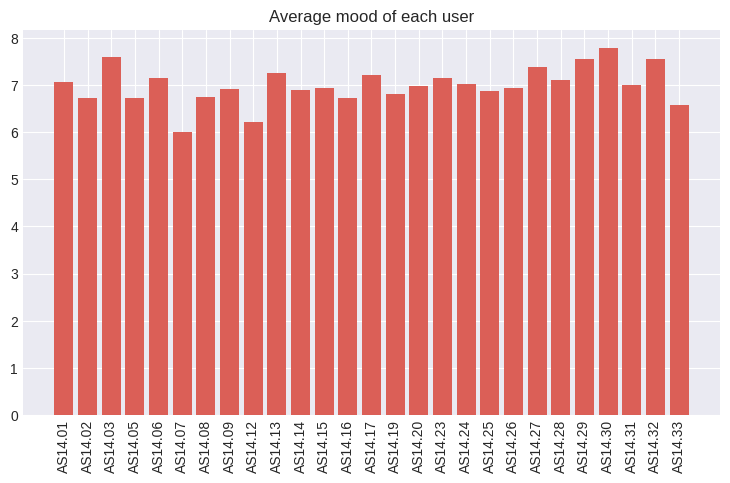

In [42]:
#plt.plot(mood_group['mood'])
plt.bar(mood_group.index,mood_group['mood'])
#for a, b in zip(mood_group.index, mood_group['mood']):
    #plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=90)
plt.title('Average mood of each user')
plt.show()

In [43]:
weekday_df=res_df[res_df['is_working_day']==True]

In [44]:
holiday_df = res_df[res_df['is_working_day']==False]

In [45]:
holiday_df['mood'].mean()

7.1140639269406405

In [46]:
weekday_df['mood'].mean()

6.939940937615356

In [47]:
holiday_mood_group=holiday_df[['date','mood']].groupby('date').agg('mean')

In [48]:
weekday_mood_group=weekday_df[['date','mood']].groupby('date').agg('mean')

In [49]:
weekday_mood_group

variable,mood
date,
2014-02-26,6.250000
2014-02-27,6.333333
2014-03-04,7.000000
2014-03-05,7.166667
2014-03-06,7.225000
...,...
2014-06-03,7.800000
2014-06-04,7.000000
2014-06-05,7.000000


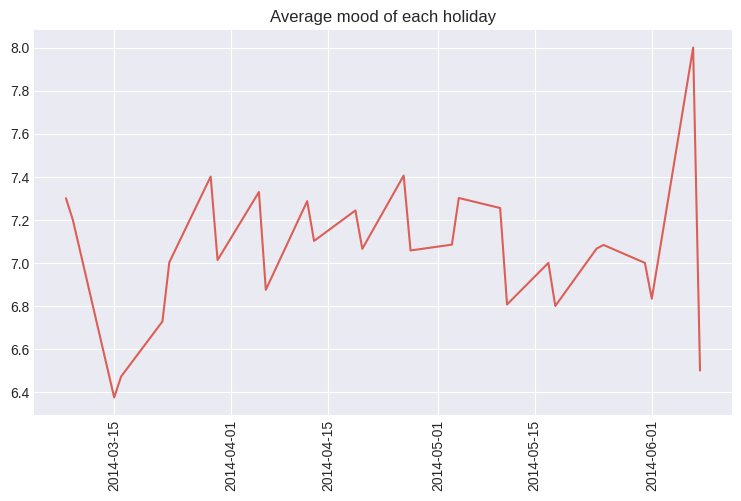

In [50]:
plt.plot(holiday_mood_group.index,holiday_mood_group['mood'])
plt.xticks(rotation=90)
plt.title('Average mood of each holiday')
plt.show()

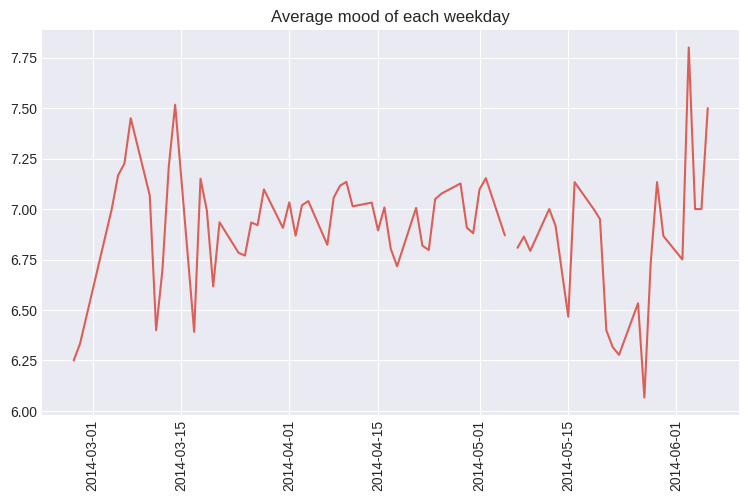

In [51]:
plt.plot(weekday_mood_group['mood'])
plt.xticks(rotation=90)
plt.title('Average mood of each weekday')
plt.show()

In [52]:
holiday_mood_user=holiday_df[['id','mood']].groupby('id').agg('mean')

In [53]:
weekday_mood_user=weekday_df[['id','mood']].groupby('id').agg('mean')

In [54]:
holiday_mood_user

variable,mood
id,
AS14.01,7.385714
AS14.02,6.281818
AS14.03,7.715476
AS14.05,6.589583
AS14.06,7.320833
AS14.07,6.261905
AS14.08,6.953704
AS14.09,7.117857
AS14.12,6.038462


In [55]:
weekday_mood_user

variable,mood
id,
AS14.01,6.925253
AS14.02,6.889444
AS14.03,7.556566
AS14.05,6.773423
AS14.06,7.101515
AS14.07,5.903922
AS14.08,6.657955
AS14.09,6.838542
AS14.12,6.292857


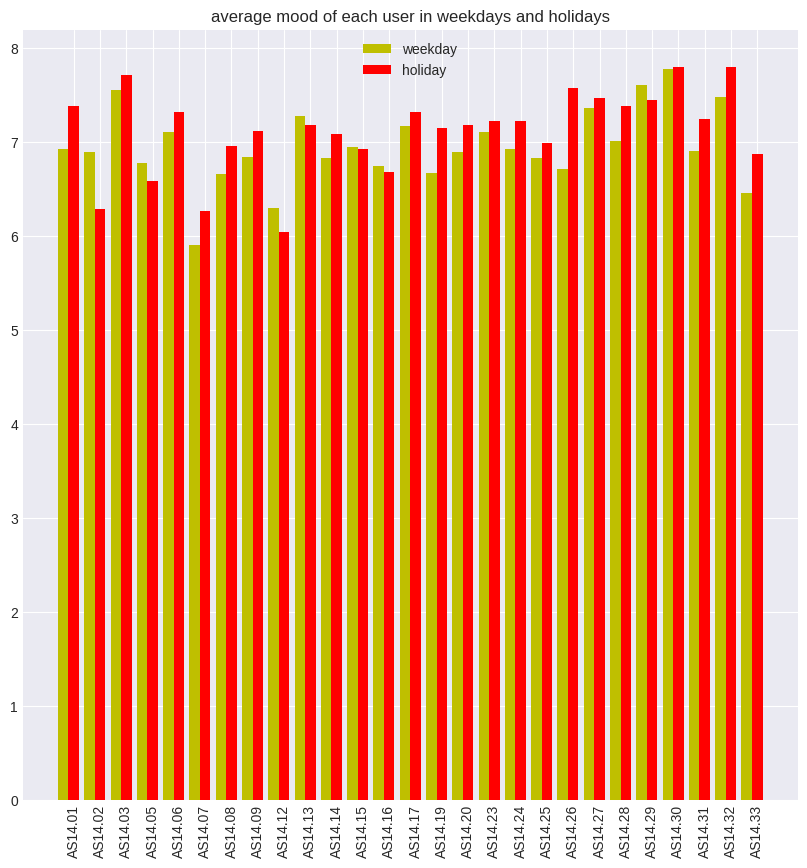

In [56]:


name_list = list(weekday_mood_user.index)
num_list = weekday_mood_user['mood']
num_list1 = holiday_mood_user['mood']
x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
plt.figure(figsize=(10,10))
plt.bar(x, num_list, width=width, label='weekday',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list1, width=width, label='holiday',tick_label = name_list,fc = 'r')
plt.xticks(rotation=90)
plt.legend()
plt.title('average mood of each user in weekdays and holidays')
plt.show()

In [57]:

from scipy import stats

 #if p value is higher than 0.05 then it is normally distributed
s = weekday_mood_user['mood']
u = s.mean()
std = s.std()
stats.kstest(s, 'norm', (u, std))

KstestResult(statistic=0.13163784535809436, pvalue=0.6891995144459135, statistic_location=6.9461538461538455, statistic_sign=1)

In [58]:
s = holiday_mood_user['mood']
u = s.mean()
std = s.std()
stats.kstest(s, 'norm', (u, std))

KstestResult(statistic=0.13775121568480403, pvalue=0.6352990454698688, statistic_location=7.0858974358974365, statistic_sign=-1)

In [59]:
stats.levene(holiday_mood_user['mood'],weekday_mood_user['mood']) # the square variance is identical

LeveneResult(statistic=0.22077415086061883, pvalue=0.6404152455234671)

In [60]:
stats.ttest_ind(holiday_mood_user['mood'],weekday_mood_user['mood'],equal_var = True) # if p value is lower than 0.05 then there is significant difference

TtestResult(statistic=1.4668671829624598, pvalue=0.1484343531423682, df=52.0)